In [62]:
#Loading
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
#Modeling
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#Visual
import matplotlib.pyplot as plt
import seaborn as sns
#For TfIdf
from scipy.sparse import csr_matrix, hstack, vstack
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

In [63]:
df = pd.read_csv('..\data\piter_filtered.csv')

In [64]:
def get_one_hot(df, cols):
  df = pd.get_dummies(data = df, columns = cols)
  print ("\nOne_hot for : {} done.".format(cols))

  return df

In [65]:
def prepare_data(data):
  data.drop(['City', 'Floor/Total floors', 'Link', 'Seller', 'Address'], axis = 1, inplace = True)#'Material' 'Address','Seller',
  y = data['Price']
  data.drop('Price', axis = 1, inplace = True)

  return data, y

In [66]:
df.head(1)

,Latitude,Longitude,City,Area,Address,Rooms,Floor/Total floors,Material,Total area,Live area,Kitchen,Toilet type,Price,Link,Seller,Comment
0,59.911448,30.308232,Санкт-Петербург,Адмиралтейский район,Измайловский пр. 16,1,4/7,СФ,28.8,19.3,3.0,Р,2750,http://www.bn.ru/detail/flats/1133049.html,АН Панорама,"доля, торг, ОС в коммун. кв"


In [67]:
cols = ['Material', 'Area', 'Toilet type']
df = get_one_hot(df, cols)


One_hot for : ['Material', 'Area', 'Toilet type'] done.


In [68]:
df.head(1)

,Latitude,Longitude,City,Address,Rooms,Floor/Total floors,Total area,Live area,Kitchen,Price,...,Area_Центральный район,Toilet type_2,Toilet type_3,Toilet type_,Toilet type_Б/В,Toilet type_В/К,Toilet type_Д,Toilet type_Д/К,Toilet type_Р,Toilet type_С
0,59.911448,30.308232,Санкт-Петербург,Измайловский пр. 16,1,4/7,28.8,19.3,3.0,2750,...,0,0,0,0,0,0,0,0,1,0


In [69]:
df, y = prepare_data(df)

## Анализ

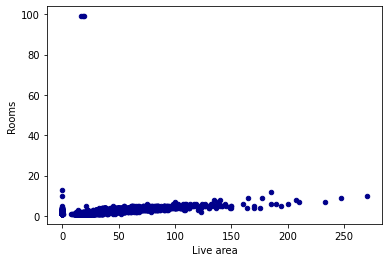

In [70]:
ax1 = df[df['Latitude']>58].plot.scatter(x='Live area',
                      y='Rooms',
                      c='DarkBlue')

## Работа с комментариями

In [71]:
def get_tfidf(str_for_train, ngram_min=1, ngram_max=2, max_feats=150):
  tfidf = TfidfVectorizer(ngram_range = (ngram_min, ngram_max), max_features = max_feats).fit(str_for_train)
  data_tfidf = tfidf.transform(np.array(str_for_train))
  return data_tfidf

In [72]:
comments = [''.join(row) for row in df['Comment']]

In [73]:
df.drop(['Comment'], axis = 1, inplace = True)

In [74]:
df.shape

(6212, 63)

In [75]:
df = hstack((df, 
            get_tfidf(comments, 1, 2, 150)))

In [76]:
df

<6212x213 sparse matrix of type '<class 'numpy.float64'>'
	with 71235 stored elements in COOrdinate format>

## Обучение модели

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_score(model.predict(X_test), y_test)

0.5108405962822667

In [78]:
mean_squared_error(model.predict(X_test), y_test)

23258259.05447906